# Stock Prediction Using Support Vector Regression_only_Close_one_Feature
    Features : Close
    Method : Support Vector Regression(SVR)

In [1]:
from pandas_datareader import data as web
import datetime
import matplotlib.pyplot as plt

In [2]:
start = datetime.datetime(2015,2,10)
end = datetime.datetime(2016,2,10)

samsung = web.DataReader("005930.KS", "yahoo", start, end)

In [3]:
samsung

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-02-10,1400000,1400000,1377000,1378000,130300,1355169.45
2015-02-11,1374000,1374000,1354000,1355000,199400,1332550.51
2015-02-12,1340000,1358000,1331000,1344000,214900,1321732.76
2015-02-13,1360000,1361000,1345000,1361000,130400,1338451.11
2015-02-16,1368000,1374000,1361000,1374000,124500,1351235.72
2015-02-17,1374000,1377000,1364000,1377000,114900,1354186.02
2015-02-18,1377000,1377000,1377000,1377000,0,1354186.02
2015-02-19,1377000,1377000,1377000,1377000,0,1354186.02
2015-02-20,1377000,1377000,1377000,1377000,0,1354186.02


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

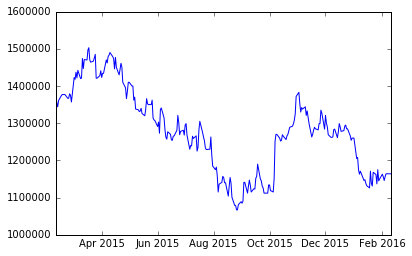

In [5]:
plt.plot(samsung.index, samsung['Close'])
plt.show()

In [59]:
import numpy as np
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)


y_tmp = samsung['Close']
y = np.array(range(len(y_tmp)), dtype='float32')

x = np.ndarray(shape=(len(y_tmp),1), dtype='float32')

for i in range(len(y_tmp)):
    x[i][0]=i

for i in range(len(y_tmp)):
    y[i] = y_tmp[i]

y_origin = y.copy()
    
y_mean = np.sum(y)/len(y)
variance = np.sum((y-y_mean)*(y-y_mean))/ (len(y)-1)
standard_deviation = np.sqrt(variance)

y = (y - y_mean) / standard_deviation

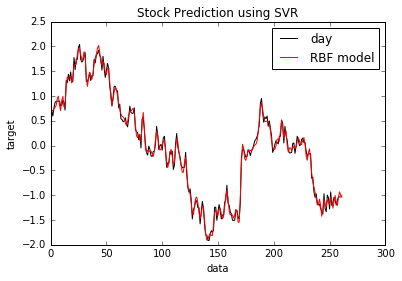

In [60]:
y_rbf = svr_rbf.fit(x,y).predict(x)
y_lin = svr_rbf.fit(x,y).predict(x)
#y_poly = svr_poly.fit(x,y).predict(x)


plt.hold('on')
plt.plot(x,y,c='k', label='day')
plt.plot(x, y_rbf, c='r', label='RBF model')
#plt.plot(x, y_lin, c='g', label='Linear model')
#plt.plot(x, y_poly, c='b', label='Poly model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Stock Prediction using SVR')
plt.legend()
plt.show()

In [61]:
svr_rbf.predict(1321)

array([ 0.00154589])

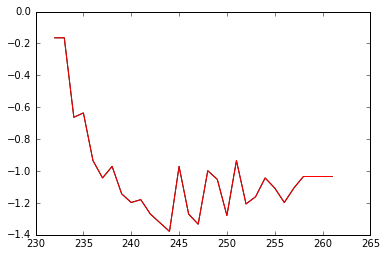

In [65]:
x_short = x[-30:][:]
y_short = y[-30:][:]
y_rbf_short = y[-30:][:]
plt.hold('on')
plt.plot(x_short,y_short,c='k', label='day')
plt.plot(x_short,y_rbf_short,c='r', label='day')

In [63]:
y_regressioned = y_rbf_short*standard_deviation+y_mean


plt.hold('on')
plt.plot(x_short,y_short,c='k', label='day')
plt.plot(x_short,y_regressioned,c='r', label='day')

array([ 1260000.,  1260000.,  1205000.,  1208000.,  1175000.,  1163000.,
        1171000.,  1152000.,  1146000.,  1148000.,  1138000.,  1132000.,
        1126000.,  1171000.,  1138000.,  1131000.,  1168000.,  1162000.,
        1137000.,  1175000.,  1145000.,  1150000.,  1163000.,  1156000.,
        1146000.,  1156000.,  1164000.,  1164000.,  1164000.,  1164000.], dtype=float32)

In [18]:
import numpy as np
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)


y_tmp = samsung['Close']
y = np.array(range(len(y_tmp)), dtype='float32')

# train data
feature_dimension = 7
x = np.ndarray(shape=(len(y_tmp),feature_dimension), dtype='float32')

features = [samsung['Open'],
          samsung['High'],
          samsung['Low'],
          samsung['Close'],
          samsung['Volume'],
          samsung['Adj Close']]

for i in range(len(x)):
    x[i][0]= i
    for j in range(1,feature_dimension-1):
        x[i][j] = features[j][i]

        

for i in range(len(y_tmp)):
    y[i] = y_tmp[i]

y = y/1000000

y_rbf = svr_rbf.fit(x,y).predict(x)
y_lin = svr_rbf.fit(x,y).predict(x)
#y_poly = svr_poly.fit(x,y).predict(x)


plt.hold('on')
plt.plot(x[0][:],y,c='k', label='data')
#plt.plot(x, y_rbf, c='r', label='RBF model')
#plt.plot(x, y_lin, c='g', label='Linear model')
#plt.plot(x, y_poly, c='b', label='Poly model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Stock Prediction using SVR')
plt.legend()
plt.show()




1378000.0